In [308]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [309]:
w=6

In [310]:
def plotIt(x_train, y_train, x_test, y_test):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    colors = np.array(["blue", "orange"])
    #plot training data:
    plt.scatter(x_train[:, 0], x_train[:, 1], color = colors[y_train.astype(int)], marker='o', alpha=1, s=40)
    #plot test data:
    plt.scatter(x_test[:, 0], x_test[:, 1], color = colors[y_test.astype(int)], marker='.', alpha=0.15, s=15)
    
    plt.xlim([-1*w,w])
    plt.ylim([-1*w,w])

#Generate training data

(-6, 6)

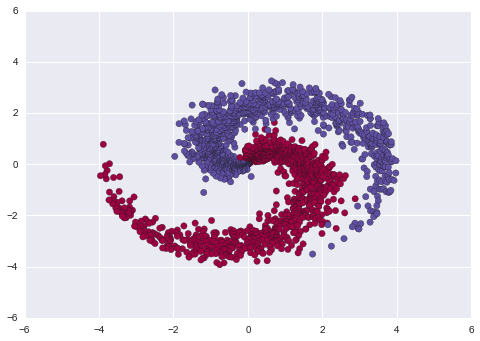

In [311]:
n = 1000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((n*K,D)) # data matrix (each row = single example)
y = np.zeros(n*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(n*j,n*(j+1))
    r = 4*np.linspace(0.0,1,n) # radius
    t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.39 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    #if j:
        #greens.append(np.c_[r*np.sin(t), r*np.cos(t)])
    #else:
        #blues.append(np.c_[r*np.sin(t), r*np.cos(t)])
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1*w,w])
plt.ylim([-1*w,w])

In [312]:
x_train = X
y_train = y

##generate some test data

In [313]:
N=2*n
x_test = np.array([0,0])
for x in np.linspace(-1*w, w, 200):
    for y in np.linspace(-1*w, w, 200):
        x_test = np.vstack((x_test, np.array([x,y])))
        
x_test = np.delete(x_test, (0), axis=0)

#SGDClassifier

In [314]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(loss="log", penalty="none", n_iter=100000)
SGD.fit(x_train, np.ravel(y_train))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100000, n_jobs=1,
       penalty='none', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [315]:
beta_SGD = SGD.coef_.T
print beta_SGD
print SGD.intercept_

[[-0.09918021]
 [ 1.31604106]]
[-0.10524771]


In [316]:
y_testSGD = SGD.predict(x_test)

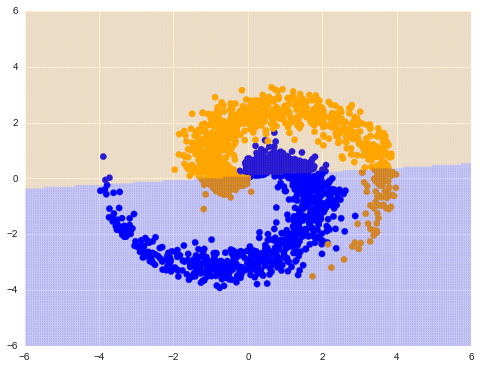

In [317]:
plotIt(x_train, y_train, x_test, y_testSGD)

#LogisticRegression

In [318]:
from sklearn.linear_model import LogisticRegression

LGSTC = LogisticRegression(solver = "liblinear")
LGSTC.fit(x_train, np.ravel(y_train))
beta_LGSTC = LGSTC.coef_.T
y_testLogistic = LGSTC.predict(x_test)

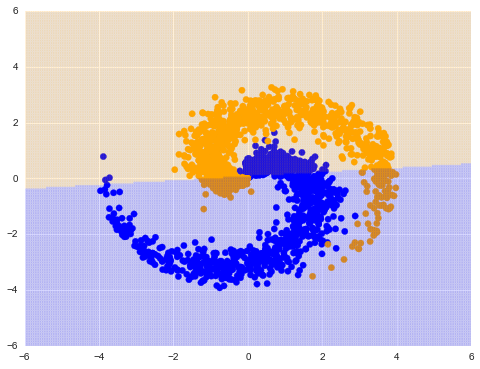

In [319]:
plotIt(x_train, y_train, x_test, y_testLogistic)

#Modified LinearRegression

In [320]:
from sklearn import linear_model
LREG = linear_model.LinearRegression()
LREG.fit(x_train, y_train)

beta_LREG = LREG.coef_.T
y_testLREG = LREG.predict(x_test)

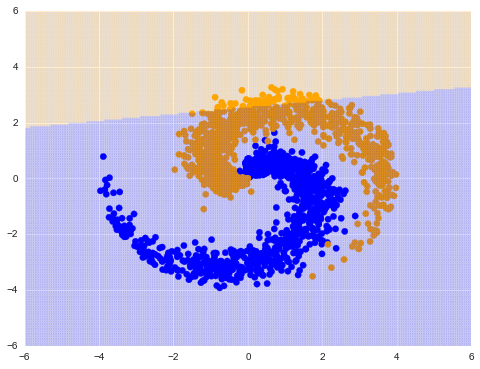

In [321]:
plotIt(x_train, y_train, x_test, y_testLREG)

#DECISION TREE

In [322]:
from sklearn import tree
TREE = tree.DecisionTreeClassifier()
TREE.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [323]:
y_testTREE = TREE.predict(x_test)

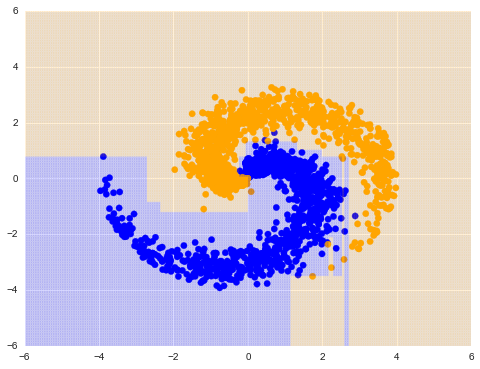

In [324]:
plotIt(x_train, y_train, x_test, y_testTREE)

#Random Forest

In [325]:
from sklearn import ensemble
FOREST = ensemble.RandomForestClassifier()
FOREST.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [326]:
y_testFOREST = FOREST.predict(x_test)

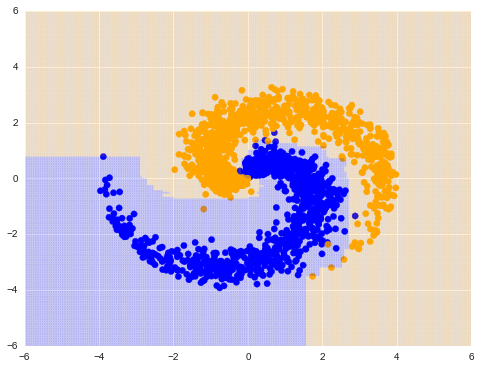

In [327]:
plotIt(x_train, y_train, x_test, y_testFOREST)